# Project - Gender recognition by voice
## EPFL - Statistical learning (MATH-412) 
## Adrien Besson

### 1. Exploratory data analysis

In [23]:
# Import libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [24]:
# Load the data
input_file = os.path.join(os.getcwd(), 'data', 'voice.csv')
data = pd.read_csv(input_file)
data['label'] = data['label'].astype('category')

In [25]:
# Drop collinear columns
cols_to_drop = ['IQR', 'dfrange', 'centroid']
data = data.drop(cols_to_drop,axis=1)

In [26]:
# Display the first columns of the dataset
data.head()

,meanfreq,sd,median,Q25,Q75,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,12.863462,274.402906,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,22.423285,634.613855,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,30.757155,1024.927705,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,1.232831,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,1.101174,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,0.208274,male


In [27]:
# Give a short description of the data
data.describe()

,meanfreq,sd,median,Q25,Q75,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,3.140168,36.568461,0.895127,0.408216,0.165282,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,4.240529,134.928661,0.044980,0.177521,0.077203,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.141735,2.068455,0.738651,0.036876,0.000000,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,1.649569,5.669547,0.861811,0.258041,0.118016,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,2.197101,8.318463,0.901767,0.396335,0.186599,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,2.931694,13.648905,0.928713,0.533676,0.221104,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,34.725453,1309.612887,0.981997,0.842936,0.280000,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,0.932374


In [28]:
# Give some general info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 18 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null category
dtypes: category(1), float64(17)
memory usage: 424.0 KB


In [29]:
# Look at the relative size of each class
data['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

Let us look at two interesting features: 'meanfreq' and 'meanfun'

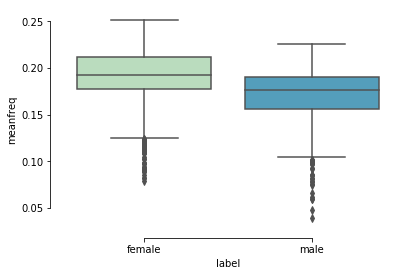

In [30]:
# Box plot for meanfreq
ax = sns.boxplot(x='label', y='meanfreq', data=data, palette='GnBu')
sns.despine(offset=10, trim=True)

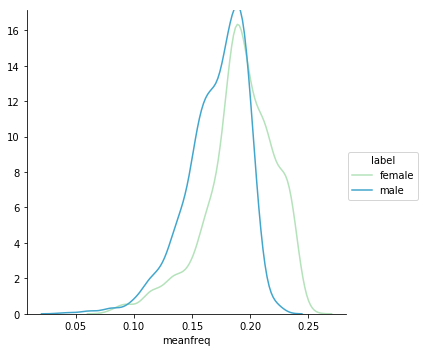

In [31]:
# Facet grid for meanfreq
f = sns.FacetGrid(data, hue="label", size=5, palette="GnBu").map(sns.kdeplot, "meanfreq").add_legend()
plt.show()

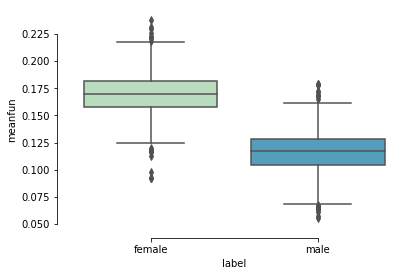

In [32]:
# Box plot for meanfun
ax = sns.boxplot(x='label', y='meanfun', data=data, palette='GnBu')
sns.despine(offset=10, trim=True)

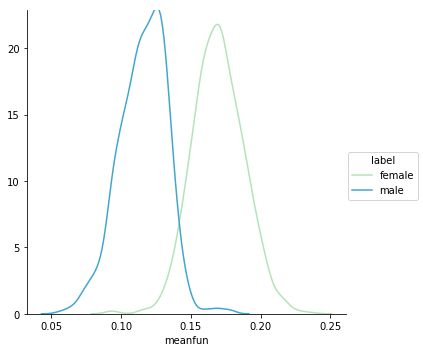

In [33]:
# Facet grid for meanfun
f = sns.FacetGrid(data, hue="label", size=5, palette="GnBu").map(sns.kdeplot, "meanfun").add_legend()
plt.show()
f.savefig("meanfun_facetgrid.pdf", bbox_inches='tight')

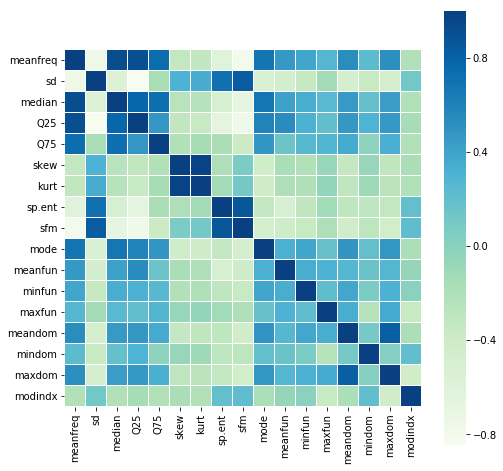

In [34]:
# Compute the correlation matrix associated with the data and plot the correlation map
corr = data.corr()
f,ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='GnBu',
            square=True, linewidths=.5)
ax.get_figure().savefig('correlation_matrix.pdf')
